<center>
    <hr> 
    <h1> Regressão Logística: Predição Variável Binária</h1>
    <br>
    <I> Feito por Yasmin Miranda, no dia 14/12/2022 </I>
    <hr> 
</center>

<center>
    <font size = "4" color = "#003666"> <B> Importando bibliotecas necessárias: </B> </font> 
</center>

In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn

from patsy import dmatrices
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
sns.set()

C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<center> 
    <font size = "4" color = "#003666"> <B> Checando endereço do diretório: </B> </font> 
</center>

In [4]:
import os
os.getcwd()

'C:\\Users\\yasmi\\Documents\\Arquivos no Jupyter Notebook'

<center>
<font size = "4" color = "#003666"> <B> Lendo, editando e visualizando a base de dados: </B> </font> 
</center>

In [37]:
dados = pd.read_csv('2.02. Binary predictors.csv')
dados

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [38]:
dados['Admitted'] = dados['Admitted'].map({'Yes': 1, 'No': 0})
dados['Gender'] = dados['Gender'].map({'Male': 1, 'Female': 0})

In [39]:
nomes={"Admitted":"Admissao", 'Gender':'Genero'}
dados=dados.rename(columns=nomes)
dados

,SAT,Admissao,Genero
0,1363,0,1
1,1792,1,0
2,1954,1,0
3,1653,0,1
4,1593,0,1
...,...,...,...
163,1722,1,0
164,1750,1,1
165,1555,0,1
166,1524,0,1


In [50]:
dados.describe()

,SAT,Admissao,Genero
count,168.000000,168.000000,168.000000
mean,1695.273810,0.559524,0.535714
std,183.019017,0.497928,0.500214
min,1334.000000,0.000000,0.000000
25%,1547.500000,0.000000,0.000000
50%,1691.500000,1.000000,1.000000
75%,1844.500000,1.000000,1.000000
max,2050.000000,1.000000,1.000000


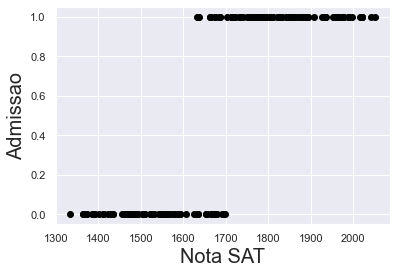

In [42]:
plt.scatter(dados['SAT'], dados['Admissao'], color="black")
plt.xlabel('Nota SAT', fontsize = 20)
plt.ylabel('Admissao', fontsize = 20)
plt.show()

C:\Users\yasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


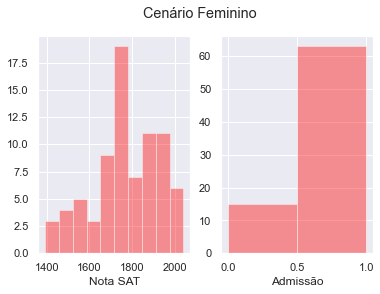

In [57]:
Fem = dados[dados['Genero']==0]
plt.subplot(121)
sns.distplot(Fem['SAT'], bins=10, 
             axlabel="Nota SAT", 
             color="red", kde=False)
 
plt.subplot(122)
sns.distplot(Fem['Admissao'], bins=2, 
             axlabel="Admissão", 
             color="red", kde=False)

plt.suptitle("Cenário Feminino")
plt.show()

In [32]:
Fem.describe()

,SAT,Admitted,Gender
count,78.000000,78.000000,78.0
mean,1770.666667,0.807692,0.0
std,159.173651,0.396664,0.0
min,1393.000000,0.000000,0.0
25%,1676.000000,1.000000,0.0
50%,1775.000000,1.000000,0.0
75%,1890.000000,1.000000,0.0
max,2041.000000,1.000000,0.0


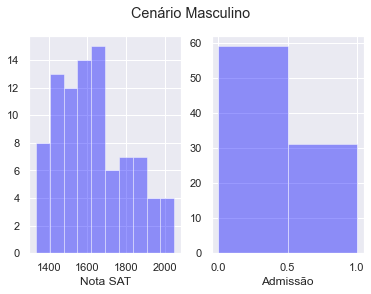

In [58]:
Masc = dados[dados['Genero']==1]
plt.subplot(121)
sns.distplot(Masc['SAT'], bins=10, 
             axlabel="Nota SAT", 
             color="blue", kde=False)
 
plt.subplot(122)
sns.distplot(Masc['Admissao'], bins=2, 
             axlabel="Admissão", 
             color="blue", kde=False)

plt.suptitle("Cenário Masculino")
plt.show()

In [31]:
Masc.describe()

,SAT,Admitted,Gender
count,90.000000,90.000000,90.0
mean,1629.933333,0.344444,1.0
std,177.856513,0.477849,0.0
min,1334.000000,0.000000,1.0
25%,1486.250000,0.000000,1.0
50%,1593.000000,0.000000,1.0
75%,1745.000000,1.000000,1.0
max,2050.000000,1.000000,1.0


<center>
<font size = "4" color = "#003666"> <B> Ajustando 1º modelo de regressão logistica: </B> </font> 
</center>

In [43]:
y = data['Admitted']
x1 = data['SAT']
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [44]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.7992
Time:                        19:28:11   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

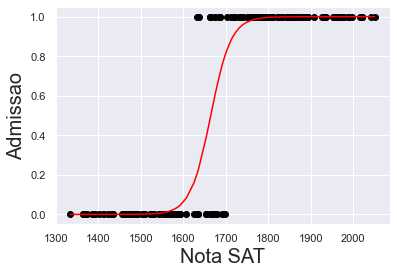

In [48]:
def f(x,b0,b1):
    return np.array(np.exp(b0+b1*x)/ (1+np.exp(b0+b1*x)))

f_ord = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_ord = np.sort(np.array(x1))

plt.scatter(x1,y,color="black")
plt.xlabel('Nota SAT', fontsize = 20)
plt.ylabel('Admissao', fontsize = 20)
plt.plot(x_ord, f_ord, color="red")
plt.show()

In [64]:
np.exp(0.042) #as chances aumentam em 4% quando a nota SAT aumenta 1 unidade

1.0428944787507632

<center>
<font size = "4" color = "#003666"> <B> Ajustando 2º modelo de regressão logistica: </B> </font> 
</center>

In [61]:
y = dados['Admissao']
x2 = dados[['SAT', 'Genero']]
x = sm.add_constant(x2)
reg_log2 = sm.Logit(y,x)
results_log2 = reg_log2.fit()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


C:\Users\yasmi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [62]:
results_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admissao   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.8249
Time:                        19:49:12   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.4040     16.321     -4.068      0.000     -98.394     -34.414
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Genero        -1.9449      0.846     -2.299      0.022      -3.603      -0.287
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [63]:
np.exp(1.9449) #as chances aumentam em 7 vezes quando a pessoa é do gênero feminino

6.992932526814459